<AxesSubplot:>

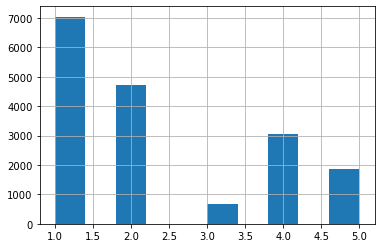

In [33]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import sklearn.naive_bayes as nb
from scipy.stats import uniform, randint
from collections import Counter
import sklearn.metrics as skm
import pandas as pd
import numpy as np

data_train = pd.read_csv("../preprocessing/preprocesed_variables_train.csv")
important_variables = pd.read_csv("../preprocessing/important.csv")

X = data_train.drop(columns=['health'])
X = X[important_variables['0']]
y = data_train['health'] + 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20712124, stratify = y)

y.hist()

[(1, 5632), (2, 5530), (3, 5590), (4, 5434), (5, 5625)]
[(1, 690), (2, 690), (3, 690), (4, 690), (5, 690)]


<AxesSubplot:>

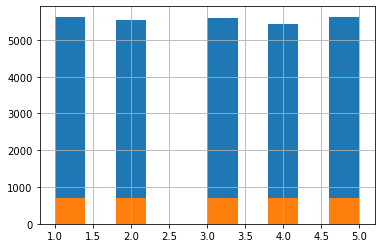

In [46]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import ClusterCentroids
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
y_resampled.hist()

# cc = ClusterCentroids(random_state=0)
# X_resampled, y_resampled = cc.fit_resample(X, y)
# print(sorted(Counter(y_resampled).items()))
# y_resampled.hist()

In [66]:
#X_resampled.loc[(X_resampled > 0).all(1),(X_resampled > 0).all(0) ]
X_resampled.loc[(X_resampled.iloc[1,:] <= 0)]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [67]:
gnb = nb.MultinomialNB().fit(X_resampled, y_resampled)

y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)

skm.log_loss(y_test, y_pred_proba), skm.accuracy_score(y_test, y_pred)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [35]:
data_test = pd.read_csv("../preprocessing/preprocesed_variables_test.csv")
og_test = pd.read_csv("../../data/test.csv")
unique_ids = og_test['uniqueid']

data_test = data_test.drop(columns='health')
data_test = data_test[important_variables['0']]
test_pred_proba = xgb_cv.predict_proba(data_test)

preds = pd.DataFrame(test_pred_proba, columns=['p1','p2','p3','p4','p5'])
preds.insert(0, 'uniqueid', unique_ids)

preds.to_csv("xgboost_pred.csv", index = False)